In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Titanic dataset
try:
   df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv') 
except FileNotFoundError:
    print("Error: Please ensure 'Titanic-Dataset.csv' is correctly loaded in your environment.")
    exit()

print("--- Initial Data Info ---")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin

In [2]:
# Impute 'Age' (Numerical) using the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute 'Embarked' (Categorical) using the mode
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Drop 'Cabin' due to high percentage of missing values
df.drop('Cabin', axis=1, inplace=True)

print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipykernel_150/4134067808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_150/4134067808.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [3]:
# Binary Categorical ('Sex'): Label Encoding
le = LabelEncoder()
df['Sex_Encoded'] = le.fit_transform(df['Sex'])
df.drop('Sex', axis=1, inplace=True)

# Multi-class Categorical ('Embarked'): One-Hot Encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, prefix='Emb')

# Drop object columns not needed for modeling (Name, Ticket)
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

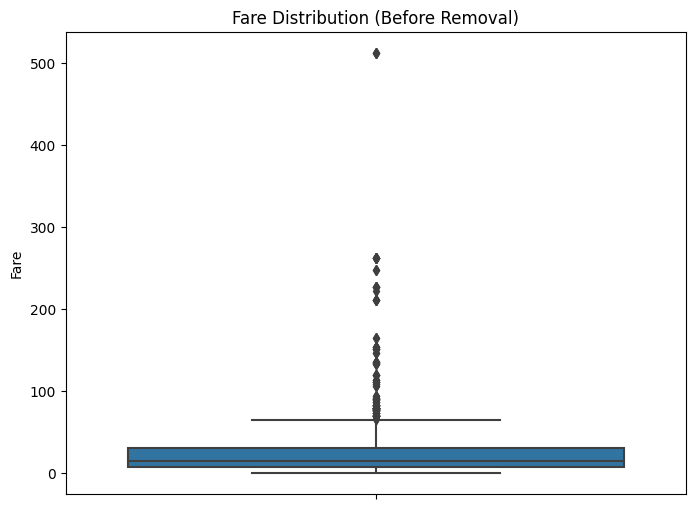


Original row count: 891. Rows after outlier removal: 775.


In [4]:
# Visualize 'Fare' distribution before removal
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Fare'])
plt.title('Fare Distribution (Before Removal)')
plt.show()

# Use the IQR method to define the upper boundary for outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers, creating an explicit deep copy
df_clean = df[df['Fare'] <= upper_bound].copy()

print(f"\nOriginal row count: {len(df)}. Rows after outlier removal: {len(df_clean)}.")

In [5]:
# Use Standardization (Z-Score Scaling) on 'Age' and 'Fare'
scaler = StandardScaler()
df_clean[['Age', 'Fare']] = scaler.fit_transform(df_clean[['Age', 'Fare']])

print("\n--- Final Clean Data Snapshot (First 5 Rows) ---")
print(df_clean.head())

# Save the final dataframe 
df_clean.to_csv('titanic_preprocessed.csv', index=False)


--- Final Clean Data Snapshot (First 5 Rows) ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris -0.528321      1      0   
2                        Heikkinen, Miss. Laina -0.215182      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.489381      1      0   
4                      Allen, Mr. William Henry  0.489381      0      0   
5                              Moran, Mr. James -0.058613      0      0   

             Ticket      Fare  Sex_Encoded  Emb_Q  Emb_S  
0         A/5 21171 -0.779117            1  False   True  
2  STON/O2. 3101282 -0.729373            0  False   True  
3            113803  2.599828            0  False   True  
4            373450 -0.720161            1  Fa